In [137]:
#attention: written in the old mix_match_environment 
#need update

import matplotlib
import PIL
from PIL import Image
import scipy 
from matplotlib import image as img
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import cv2

In [156]:
# read the image first 
# image is a 3D arrage (M x N x 3) - M and N are the dimensions of the image 

# img = Image.open("../00_data/00_test_pic/frog_2.jpg")
img = cv2.imread("../00_data/00_test_pic/frog_2.jpg")

In [157]:
type(img)

numpy.ndarray

In [158]:
# covert image into RGB values. 
# each pixel is a list fo 3 numbers, which describes Red, Green and Blue for the specific pixel
# the code decomposes each pixel and store the into respective list (red, green, blue)

b = []
g = []
r = []

for line in image:
    for pixel in line:
        temp_b, temp_g, temp_r = pixel
        b.append(temp_b)
        g.append(temp_g)
        r.append(temp_r)



In [161]:
df = pd.DataFrame({"blue" : b, "green" : g, "red" : r})

In [162]:
df

,blue,green,red
0,109,100,57
1,109,100,57
2,108,99,56
3,109,100,57
4,110,101,58
...,...,...,...
126079,120,124,97
126080,120,124,97
126081,121,125,100
126082,124,128,103


In [163]:
model = KMeans(n_clusters=3, init="random")
clusters = model.fit(df)

In [164]:
clusters

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [165]:
df["cluster"] = clusters.predict(df)

In [166]:
df["cluster"].value_counts()

2    51709
0    40179
1    34196
Name: cluster, dtype: int64

In [167]:
clusters.cluster_centers_

array([[ 62.88487169,  67.32571613,  39.4321663 ],
       [167.52289976, 166.03478184, 124.67008527],
       [115.70495352, 118.57706654,  80.60924605]])

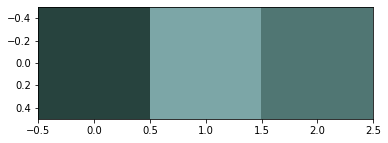

In [168]:
colors = []

for cluster_center in clusters.cluster_centers_:
    scaled_b, scaled_g, scaled_r = cluster_center
    colors.append((
                    scaled_r / 255,
                    scaled_g / 255,
                    scaled_b / 255
                  ))

plt.imshow([colors])
plt.show()

In [169]:
# just a test to sea the variables

for cluster_center in clusters.cluster_centers_:
    scaled_r, scaled_g, scaled_b = cluster_center
    print(scaled_r, scaled_g, scaled_b)

62.884871692889476 67.32571613283736 39.432166301969815
167.5228997568117 166.03478184424677 124.67008526972823
115.704953518484 118.57706654298097 80.60924605245401


In [103]:
# The example used scipy instead of Sklearn
# Example code also standardized the scale for each column of df

In [104]:
# Try re-do the results inkl. standardization

In [185]:
df_2 = df.drop("cluster", axis=1).copy()

In [186]:
df_2

,blue,green,red
0,109,100,57
1,109,100,57
2,108,99,56
3,109,100,57
4,110,101,58
...,...,...,...
126079,120,124,97
126080,120,124,97
126081,121,125,100
126082,124,128,103


In [107]:
# the exmample shows the scipy whiten function. However, it didn't work here.
# However, the whiten function suppose to divide each array by its stdv. So I will calculate it manually

In [187]:
b_std, g_std, r_std = df_2[['blue', 'green', 'red']].std() 

In [188]:
df_2 = df_2.assign(b_scaled = df_2["blue"] / b_std )
df_2 = df_2.assign(g_scaled = df_2["green"] / g_std )
df_2 = df_2.assign(r_scaled = df_2["red"] / r_std )

In [189]:
df_2.head()

,blue,green,red,b_scaled,g_scaled,r_scaled
0,109,100,57,2.307687,2.257406,1.382520
1,109,100,57,2.307687,2.257406,1.382520
2,108,99,56,2.286516,2.234832,1.358265
3,109,100,57,2.307687,2.257406,1.382520
4,110,101,58,2.328859,2.279980,1.406775


In [190]:
df_2 = df_2.drop(["blue", "green", "red"], axis = 1).copy()

In [179]:
df_2

,b_scaled,g_scaled,r_scaled
0,2.307687,2.257406,1.382520
1,2.307687,2.257406,1.382520
2,2.286516,2.234832,1.358265
3,2.307687,2.257406,1.382520
4,2.328859,2.279980,1.406775
...,...,...,...
126079,2.540573,2.799184,2.352710
126080,2.540573,2.799184,2.352710
126081,2.561744,2.821758,2.425474
126082,2.625259,2.889480,2.498238


In [191]:
model_2 = KMeans(n_clusters=3, init="random")
clusters_2 = model_2.fit(df_2)
df_2["cluster"] = clusters_2.predict(df_2)

In [192]:
df_2.cluster.value_counts()

0    51001
2    39388
1    35695
Name: cluster, dtype: int64

In [193]:
clusters_2.cluster_centers_

array([[2.43393115, 2.66234351, 1.91568699],
       [3.49744764, 3.71550497, 3.04232577],
       [1.33474897, 1.50672972, 0.932739  ]])

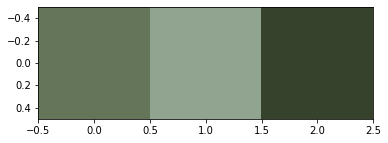

In [196]:
colors_2 = []

for cluster_center in clusters_2.cluster_centers_:
    scaled_r, scaled_g, scaled_b = cluster_center
    colors_2.append((
                    (scaled_r * r_std / 255),
                    (scaled_g * g_std / 255),
                    (scaled_b * b_std / 255)
                  ))

plt.imshow([colors_2])
plt.show()

In [201]:
color_1_r, color_1_g, color_1_b = colors_2[0]
color_2_r, color_2_g, color_2_b = colors_2[1]
color_3_r, color_3_g, color_3_b = colors_2[2]

#### --> the standardized approach returns a more valid result. 

## Write a function, which takes in a folder and returns a dataframe with 9 columns for the dominant colors. 